In [59]:
import matplotlib.pyplot as plt
from math import comb

10.1 Korttipakasta nostetaan yksi kortti. Korteilla väliltä 1-6 pelaaja voittaa 5 euroa, korteilla 7-11 pelaaja voittaa 10 euroa ja korteilla 12-13 pelaaja häviää 20 euroa. Muodosta tilanteesta diskreetti satunnaismuuttuja ja sen todennäköisyysjakauma. Laske myös kertymäfunktion 𝐹(𝑥) arvot samaan taulukkoon.

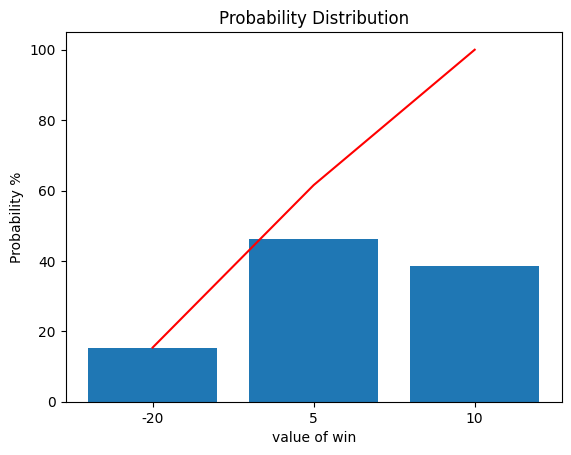

In [60]:
## Code here
discrete_probability = {"-20":8/52, "5":24/52, "10":20/52}

# lets change the values into percentages
for key in discrete_probability:
    discrete_probability[key] = round(discrete_probability[key] * 100, 2)

# lets calculate F(X)
CDF = {}
for key in discrete_probability:
    if key == "-20":
        CDF[key] = discrete_probability[key]
        temp = key
    else:
        CDF[key] = CDF[temp] + discrete_probability[key]
        temp = key

## Lets plot the probability distribution
plt.bar(discrete_probability.keys(), discrete_probability.values())
plt.plot(CDF.keys(), CDF.values(), c='red')
plt.xlabel('value of win')
plt.ylabel('Probability %')
plt.title('Probability Distribution')
plt.show()


10.2 Laske edellisen tehtävän diskreetin todennäköisyysjakauman odotusarvo ja keskihajonta. Onko kyseisen pelin pelaaminen suositeltavaa pitkällä aikavälillä? Kuinka paljon keskimäärin yhdellä pelikerralla voittaa?

In [61]:
## Code here
# lets calculate the expected value
expected_value = 0
for key in discrete_probability:
    key_numeric = float(key)  # Convert 'key' to a float
    expected_value += key_numeric * discrete_probability[key] / 100

print('The expected value is: ', expected_value)

# lets calculate the variance
variance = 0
for key in discrete_probability:
    key_numeric = float(key)
    variance += (key_numeric - expected_value)**2 * discrete_probability[key] / 100

# square root of variance is standard deviation
standard_deviation = variance ** 0.5
print('The standard deviation is: ', standard_deviation)


The expected value is:  3.0775
The standard deviation is:  10.101759581843899


10.3 Alla olevassa taulukossa on Ässä-arvan voittojen summat ja niiden lukumäärät. Yhteensä ässäarpoja on painettu 3 000 000 kpl ja yhden arvan hinta on 4 euroa (voittotaulukon voitoista ei ole vähennetty arvan hintaa). Olkoon diskreettinä satunnaismuuttujana 𝑋 yhden arvan ostamisen tuottama kokonaisvoitto. Muodosta tilanteesta todennäköisyysjakauma, jossa on myös kertymäfunktion arvot.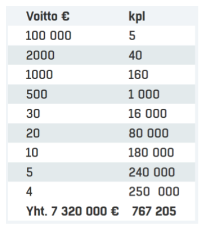

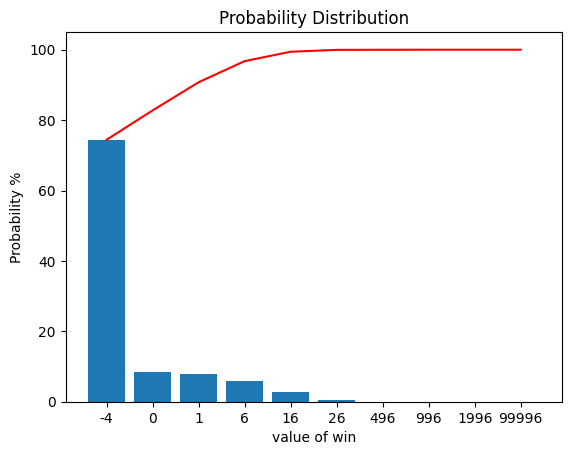

In [62]:
## Code here
winning_coupons = 5 + 40 + 160 + 1_000 + 16_000 + 80_000 + 180_000 + 240_000 + 250_000
total_coupons = 3_000_000
non_winning_coupons = total_coupons - winning_coupons

# It is important to have strings as keys in these because of plot scaling
discrete_winnings = {"-4":non_winning_coupons/total_coupons, "0":250_000/total_coupons, "1":240_000/total_coupons, "6":180_000/total_coupons, "16":80_000/total_coupons, "26":16_000/total_coupons, "496":1_000/total_coupons, "996":160/total_coupons, "1996":40/total_coupons, "99996":5/total_coupons}

# lets change the values into percentages
for key in discrete_winnings:
    discrete_winnings[key] = round(discrete_winnings[key] * 100, 2)


# lets calculate F(X)
CDF = {}
for key in discrete_winnings:
    if key == "-4":
        CDF[key] = discrete_winnings[key]
        temp = key
    else:
        CDF[key] = CDF[temp] + discrete_winnings[key]
        temp = key

## Lets plot the probability distribution in seaborn
plt.bar(discrete_winnings.keys(), discrete_winnings.values())
plt.plot(CDF.keys(), CDF.values(), c='red')
plt.xlabel('value of win')
plt.ylabel('Probability %')
plt.title('Probability Distribution')
plt.show()



10.4 Laske edellisen tehtävän Ässä-arvan odotusarvo ja keskihajonta. Onko Ässä-arvan ostaminen kannattavaa? Mikä on tappioprosentti (tappio/hinta)? Laske myös 𝑃(𝑋≥10) ja 𝑃(1≤𝑋≤30).

In [63]:
## Code here
# lets calculate the expected value
expected_value = 0
for key in discrete_winnings:
    expected_value += int(key) * discrete_winnings[key] / 100

print('The expected value is: ', expected_value)

# Lets calculate standard deviation
variance = 0
for key in discrete_winnings:
    variance += (int(key) - expected_value)**2 * discrete_winnings[key] / 100

# square root of variance is standard deviation
standard_deviation = variance ** 0.5
print('The standard deviation is: ', standard_deviation)

print('It is not a good idea to play this game because the expected value is negative.')
print('percentage of loss: ', round(expected_value/4, 2), '%')

# Lets calculate the probability of winning more than 10 eur
probability = 0
for key in discrete_winnings:
    if int(key) > 10:
        probability += discrete_winnings[key]

print('The probability of winning more than 10 eur is: ', round(probability, 2))

# lets calculate the probability of winning 1 to 30 eur
probability = 0
for key in discrete_winnings:
    if int(key) >= 1 and int(key) <= 30:
        probability += discrete_winnings[key]

print('The probability of winning between 1 and 30 eur is: ', round(probability, 2))


The expected value is:  -1.7238000000000004
The standard deviation is:  13.9499718121579
It is not a good idea to play this game because the expected value is negative.
percentage of loss:  -0.43 %
The probability of winning more than 10 eur is:  3.24
The probability of winning between 1 and 30 eur is:  17.2


10.5 Ruletissa voit panostaa rahaa jokaiselle luvulle väliltä 0-36. Mikäli ruletin pallo pysähtyy panostetulle luvulle, voitat panostamasi summan 36 kertaisena. Mikä on ruletin tappioprosentti? Huom., muut panostusmahdollisuudet (pariton/parillinen, musta/punainen, iso/pieni, rivit/sarakkeet) eivät muuttaisi tappioprosenttia.

In [64]:
## Code here
# lets divide the times the person could lose by all the possible outcomes
lose_rate = round(36/37 * 100, 2)
print('The percentage of losing is: ', lose_rate, '%')

The percentage of losing is:  97.3 %


10.6. Lotossa arvotaan 7 oikeaa numeroa 40:stä numerosta. Veikkaaja valitsee itse myös 7 numeroa ja jää voitolle alla olevan taulukon mukaisen summan euroina sen perusteella kuinka monta numero hän sai oikein. Yksi lottoarpa maksaa siis yhden euron ja vasta 3:lla oikealla numerolla jää voitolle. Päävoitosta jää voitolle 3 250 000. Muodosta tilanteesta todennäköisyysjakauma. Mikä on odotusarvo ja tappioprosentti? (Vinkki: oikeiden numeroiden todennäköisyydet kannattaa laskea binomikertoimella.)
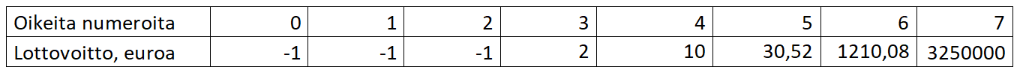

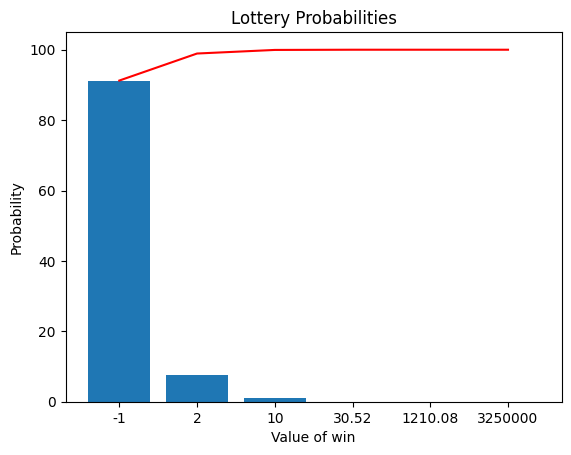

The expected value is:  -0.6383880000000001
The percentage of losing is:  0.6383880000000001 %


In [70]:
## Code here
# lets use combinations to calculate the probability of winning

tot_numbers = 40
numbers = 7
x = range(numbers+1)
y = [comb(numbers, i) * comb(tot_numbers-numbers, numbers-i) / comb(tot_numbers, numbers) for i in x]

## lets turn the probabilities into percentages
for i in range(len(y)):
    y[i] = round(y[i] * 100, 2)

x = ["-1", "-1", "-1", "2", "10", "30.52", "1210.08", "3250000"]

CDF = {}
for i in range(len(y)):
    if i == 0:
        CDF[x[i]] = y[i]
        temp = x[i]
    else:
        CDF[x[i]] = CDF[temp] + y[i]
        temp = x[i]


# Cleaning up the data so that -1 entries are one
x = ["-1", "2", "10", "30.52", "1210.08", "3250000"]
y[0] = round(y[0] + y[1] + y[2], 2)
y.pop(1)
y.pop(1)


# Lets plot the probability distribution
plt.bar(x, y)
plt.plot(CDF.keys(), CDF.values(), c='red')
plt.xlabel('Value of win')
plt.ylabel('Probability')
plt.title('Lottery Probabilities')
plt.show()

# Expected value
expected_value = 0
for i in range(len(x)):
    expected_value += float(x[i]) * y[i] / 100

print('The expected value is: ', expected_value)

# Loss rate
lose_rate = expected_value / -1
print('The percentage of losing is: ', lose_rate, '%')